In [2]:
import pandas as pd
data= pd.concat([
    pd.read_csv(r'C:/Users/bharg/OneDrive/Desktop/ML-Project/customer_churn_dataset-training-master.csv'),
    pd.read_csv(r'C:/Users/bharg/OneDrive/Desktop/ML-Project/customer_churn_dataset-testing-master.csv')
],
    axis=0)
data = data.drop(columns=['CustomerID'])
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
print(data.isnull().sum())
print(data.duplicated().sum())
print(data.shape)

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64
0
(505207, 11)


In [4]:
null_info = {col: data[data[col].isnull()].index.tolist() for col in data.columns if data[col].isnull().sum() > 0}
print(null_info)

{'Age': [199295], 'Gender': [199295], 'Tenure': [199295], 'Usage Frequency': [199295], 'Support Calls': [199295], 'Payment Delay': [199295], 'Subscription Type': [199295], 'Contract Length': [199295], 'Total Spend': [199295], 'Last Interaction': [199295], 'Churn': [199295]}


In [5]:
#Handling Null Values
print(199295 in data.index)  # Should return True or False
data = data.drop(data.index[199295])
data.isnull().sum()

True


Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [6]:
import numpy as np
import pandas as pd  # Ensure pandas is imported
from sklearn.impute import SimpleImputer

print("\n--- Checking for Corrupted Data ---")

# Assuming 'data' is a Pandas DataFrame
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):  # Check if the column is numeric
        negative_values = data[column][data[column] < 0]
        if not negative_values.empty:  # Check if there are negative values
            print(f"Negative values found in {column}: {negative_values.values}")

            # Replace negative values with NaN
            data[column] = data[column].apply(lambda x: np.nan if x < 0 else x)

            # Impute missing values with the mean of the column
            imputer = SimpleImputer(strategy='mean')
            data[column] = imputer.fit_transform(data[[column]])

            # Print debug info
            print(f"After handling, column {column}:")
            print(data[column].head())  # Print first few rows for verification
        else:
            print(f"No negative values found in {column}")



--- Checking for Corrupted Data ---
No negative values found in Age
No negative values found in Tenure
No negative values found in Usage Frequency
No negative values found in Support Calls
No negative values found in Payment Delay
No negative values found in Total Spend
No negative values found in Last Interaction
No negative values found in Churn


In [7]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze specific numeric columns
columns_to_check = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
for col in columns_to_check:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    print(f"\nColumn: {col}")
    print(f"Lower Bound: {lower}, Upper Bound: {upper}")
    print(f"Number of Outliers: {len(outliers)}")



Column: Age
Lower Bound: -1.0, Upper Bound: 79.0
Number of Outliers: 0

Column: Tenure
Lower Bound: -29.0, Upper Bound: 91.0
Number of Outliers: 0

Column: Usage Frequency
Lower Bound: -14.5, Upper Bound: 45.5
Number of Outliers: 0

Column: Support Calls
Lower Bound: -6.5, Upper Bound: 13.5
Number of Outliers: 0

Column: Payment Delay
Lower Bound: -15.0, Upper Bound: 41.0
Number of Outliers: 0

Column: Total Spend
Lower Bound: -121.0, Upper Bound: 1391.0
Number of Outliers: 0

Column: Last Interaction
Lower Bound: -15.5, Upper Bound: 44.5
Number of Outliers: 0


In [8]:
data.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [9]:
print(data.Churn.value_counts())

Churn
1.0    280492
0.0    224714
Name: count, dtype: int64


In [10]:
# Ensure column names are clean
data.columns = data.columns.str.strip()

# Define categorical columns
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,False,False,True,False,False
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,False,False,False,True,False
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,False,False,False,False,True
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0,True,False,True,True,False
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0,True,False,False,True,False


In [11]:
# Feature Engineering
# Add interaction features
data_encoded['Usage_per_Tenure'] = data_encoded['Usage Frequency'] / data_encoded['Tenure']
data_encoded['Spend_per_Usage'] = data_encoded['Total Spend'] / data_encoded['Usage Frequency']
data_encoded['Calls_per_Usage'] = data_encoded['Support Calls'] / data_encoded['Usage Frequency']

# Handle any infinite values from division
data_encoded = data_encoded.replace([np.inf, -np.inf], np.nan)
data_encoded = data_encoded.fillna(data_encoded.mean())

# Add polynomial features for important numerical columns
from sklearn.preprocessing import PolynomialFeatures
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Total Spend']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_encoded[numeric_cols])

In [12]:
# Calculate the correlation matrix on the encoded dataset
# 🚨 Remove CustomerID (it should not be a feature)

correlation_matrix = data_encoded.corr()

# Get correlation values for the 'Churn' column
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Print formatted output
print("Top Correlated Features with Churn:")
print(churn_correlation)


Top Correlated Features with Churn:
Churn                         1.000000
Support Calls                 0.516283
Contract Length_Monthly       0.366495
Payment Delay                 0.329785
Calls_per_Usage               0.236354
Age                           0.191224
Last Interaction              0.127150
Usage_per_Tenure              0.004847
Subscription Type_Standard   -0.007928
Subscription Type_Premium    -0.011012
Tenure                       -0.021308
Spend_per_Usage              -0.044355
Usage Frequency              -0.053263
Contract Length_Quarterly    -0.156347
Gender_Male                  -0.168989
Total Spend                  -0.369682
Name: Churn, dtype: float64


<Figure size 2000x1000 with 0 Axes>

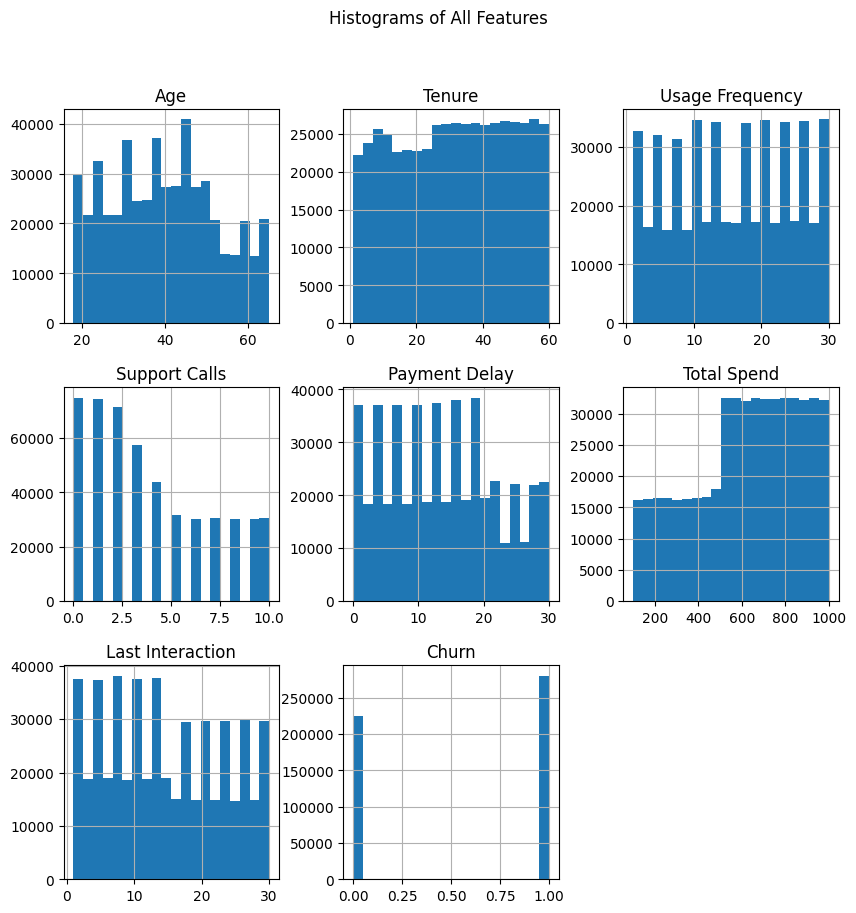

In [ ]:
#Data Visualization using Histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
data.hist(bins=20, figsize=(16, 10))
plt.suptitle('Histograms of All Features')
plt.show()

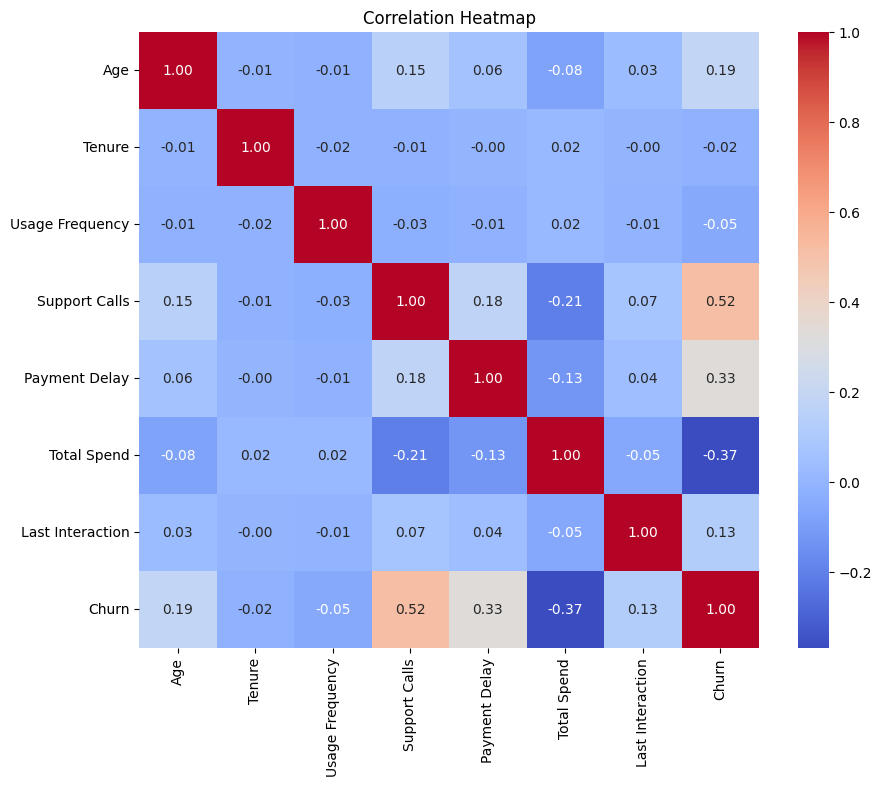

In [16]:
#Data Visualization using Heat Map
# Filter numeric columns only
import matplotlib.pyplot as plt
import seaborn as sns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Check if numeric_data is empty (no numeric columns)
if numeric_data.empty:
    print("No numeric columns available for correlation heatmap.")
else:
    # Compute and plot the heatmap
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap')
    plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Label / data separation
# Use the encoded data instead of original
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']
"""
if 'Payment Delay' in X.columns:
    X['Payment Delay'] = pd.cut(
        X['Payment Delay'],
        bins=[-1, 0, 2, 5, 10, 100],  
        labels=[0, 1, 2, 3, 4]  # 0 = No delay, 1 = Short delay, etc.
    ).astype(int)
    
else:
    print("⚠️ 'Payment Delay' column not found. Skipping transformation.")
"""
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# Training the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = model.predict(X_test_scaled)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8462718473506067

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     44981
         1.0       0.87      0.85      0.86     56061

    accuracy                           0.85    101042
   macro avg       0.84      0.85      0.84    101042
weighted avg       0.85      0.85      0.85    101042


Confusion Matrix:
[[38021  6960]
 [ 8573 47488]]


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, you can also print the confusion matrix or classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 93.37%
[[38460  6521]
 [  180 55881]]
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92     44981
         1.0       0.90      1.00      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Initialize the SVM model (you can adjust the 'C' and 'kernel' parameters)
svm = SVC(kernel='linear', C=1)  # 'kernel' can be 'linear', 'rbf', etc., and 'C' is the regularization parameter

# Train the model
svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, you can also print the confusion matrix or classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [27]:

       #Using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Initialize the KNN model (you can adjust the 'n_neighbors' parameter)
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors is a hyperparameter

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, you can also print the confusion matrix or classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 89.41%
[[39111  5870]
 [ 4826 51235]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     44981
         1.0       0.90      0.91      0.91     56061

    accuracy                           0.89    101042
   macro avg       0.89      0.89      0.89    101042
weighted avg       0.89      0.89      0.89    101042



In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  

# Train the model
xgb.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [19:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 93.26%
Confusion Matrix:
[[38500  6481]
 [  334 55727]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     44981
         1.0       0.90      0.99      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.94      0.92      0.93    101042
weighted avg       0.94      0.93      0.93    101042



In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost
import sklearn

print(f"XGBoost version: {xgboost.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_xgb = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


XGBoost version: 2.1.3
scikit-learn version: 1.6.1


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the LightGBM classifier
lgbm = LGBMClassifier()

# Train the model
lgbm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lgbm.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')l

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 224431, number of negative: 179733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 404164, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555297 -> initscore=0.222096
[LightGBM] [Info] Start training from score 0.222096


C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 93.43%
Confusion Matrix:
[[38462  6519]
 [  117 55944]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92     44981
         1.0       0.90      1.00      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree model (you can adjust the 'max_depth' and other parameters)
dtree = DecisionTreeClassifier(random_state=42, max_depth=5)  # 'max_depth' can be adjusted for tree depth

# Train the model
dtree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = dtree.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, you can also print the confusion matrix or classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 91.63%
[[38499  6482]
 [ 1977 54084]]
              precision    recall  f1-score   support

         0.0       0.95      0.86      0.90     44981
         1.0       0.89      0.96      0.93     56061

    accuracy                           0.92    101042
   macro avg       0.92      0.91      0.91    101042
weighted avg       0.92      0.92      0.92    101042



In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize the AdaBoost model (you can adjust the 'n_estimators' and 'learning_rate' parameters)
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)  # 'n_estimators' is the number of weak learners

# Train the model
adaboost.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, you can also print the confusion matrix or classification report
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 86.30%
[[39793  5188]
 [ 8656 47405]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85     44981
         1.0       0.90      0.85      0.87     56061

    accuracy                           0.86    101042
   macro avg       0.86      0.87      0.86    101042
weighted avg       0.87      0.86      0.86    101042



In [32]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Define individual models
lgbm = lgb.LGBMClassifier()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Create a hybrid (ensemble) model using Voting Classifier
hybrid_model = VotingClassifier(
    estimators=[('lgbm', lgbm), ('rf', rf), ('lr', lr)], 
    voting='soft'  # 'soft' for probability averaging, 'hard' for majority voting
)

# Define evaluation metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation on the hybrid model
cv_results = cross_validate(hybrid_model, X_train_scaled, y_train, cv=5, scoring=scoring)

# Print results
print(f'Mean Accuracy: {np.mean(cv_results["test_accuracy"]):.4f}')
print(f'Mean Precision: {np.mean(cv_results["test_precision"]):.4f}')
print(f'Mean Recall: {np.mean(cv_results["test_recall"]):.4f}')
print(f'Mean F1 Score: {np.mean(cv_results["test_f1"]):.4f}')


C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 179545, number of negative: 143786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 323331, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555298 -> initscore=0.222100
[LightGBM] [Info] Start training from score 0.222100


C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 179545, number of negative: 143786
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 323331, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555298 -> initscore=0.222100
[LightGBM] [Info] Start training from score 0.222100


C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 179545, number of negative: 143786
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 323331, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555298 -> initscore=0.222100
[LightGBM] [Info] Start training from score 0.222100


C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 179544, number of negative: 143787
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 323331, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555295 -> initscore=0.222087
[LightGBM] [Info] Start training from score 0.222087


C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 179545, number of negative: 143787
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1185
[LightGBM] [Info] Number of data points in the train set: 323332, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.555296 -> initscore=0.222093
[LightGBM] [Info] Start training from score 0.222093


C:\Users\bharg\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Mean Accuracy: 0.9344
Mean Precision: 0.8985
Mean Recall: 0.9942
Mean F1 Score: 0.9439


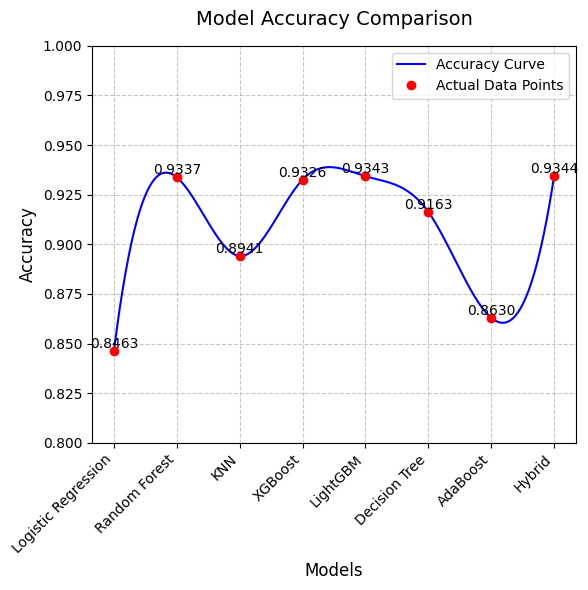

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Data
models = ['Logistic Regression', 'Random Forest', 'KNN', 'XGBoost', 
          'LightGBM', 'Decision Tree', 'AdaBoost', 'Hybrid']
accuracies = [0.8463, 0.9337, 0.8941, 0.9326, 0.9343, 0.9163, 0.8630, 0.9344]

# Create x-axis points
x = np.arange(len(models))

# Create smooth curve using spline interpolation
x_smooth = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, accuracies, k=3)  # k=3 for cubic spline
y_smooth = spl(x_smooth)

# Create the plot
plt.figure(figsize=(6, 6))
plt.plot(x_smooth, y_smooth, 'b-', label='Accuracy Curve')  # Blue line
plt.plot(x, accuracies, 'ro', label='Actual Data Points')  # Red dots for actual values

# Customize the plot
plt.title('Model Accuracy Comparison', fontsize=14, pad=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.8, 1.0)  # Set y-axis range from 0.8 to 1.0

# Set x-ticks
plt.xticks(x, models, rotation=45, ha='right')

# Add value labels for actual data points
for i, (xi, yi) in enumerate(zip(x, accuracies)):
    plt.text(xi, yi, f'{yi:.4f}', ha='center', va='bottom')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()